<a href="https://colab.research.google.com/github/kvenkatsai2985/365ENTERTAINMENTPROJECT/blob/main/assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import pandas as pd

In [2]:
# Define the cities and their corresponding distances
cities = ['Bucharest', 'Fagaras', 'Pitesti', 'Rimnicu Vilcea', 'Sibiu']
distances = [
    [0, 211, 101, np.inf, np.inf],  # Bucharest
    [211, 0, np.inf, np.inf, 99],   # Fagaras
    [101, np.inf, 0, 97, np.inf],   # Pitesti
    [np.inf, np.inf, 97, 0, 80],    # Rimnicu Vilcea
    [np.inf, 99, np.inf, 80, 0]     # Sibiu
]

In [3]:
# Create a DataFrame
df = pd.DataFrame(distances, columns=cities, index=cities)

# Replace np.inf with a large number for better readability
df.replace(np.inf, 9999, inplace=True)

# Save the DataFrame to a CSV file
df.to_csv('intercity_distances.csv')
print("Dataset saved as 'intercity_distances.csv'")

Dataset saved as 'intercity_distances.csv'


In [4]:
# Load the intercity distances from the CSV file
df = pd.read_csv('intercity_distances.csv', index_col=0)

# Convert DataFrame to a numpy array for processing
graph = df.replace(9999, np.inf).to_numpy()

In [5]:
# Define the heuristic function for Best-First and A* Search
def heuristic(city1, city2):
    return graph[city1][city2]

# Breadth-First Search
def bfs(start, goal):
    queue = [(start, [start])]
    visited = set()
    while queue:
        current, path = queue.pop(0)
        if current == goal:
            return path
        visited.add(current)
        for neighbor in range(len(graph)):
            if graph[current][neighbor] != np.inf and neighbor not in visited:
                queue.append((neighbor, path + [neighbor]))
    return None

# Depth-First Search
def dfs(start, goal):
    stack = [(start, [start])]
    visited = set()
    while stack:
        current, path = stack.pop()
        if current == goal:
            return path
        visited.add(current)
        for neighbor in range(len(graph)):
            if graph[current][neighbor] != np.inf and neighbor not in visited:
                stack.append((neighbor, path + [neighbor]))
    return None

# Best-First Search (Greedy)
def best_first_search(start, goal):
    queue = [(0, start, [start])]  # (priority, current, path)
    visited = set()
    while queue:
        queue.sort()  # Sort by priority
        _, current, path = queue.pop(0)
        if current == goal:
            return path
        visited.add(current)
        for neighbor in range(len(graph)):
            if graph[current][neighbor] != np.inf and neighbor not in visited:
                priority = heuristic(neighbor, goal)
                queue.append((priority, neighbor, path + [neighbor]))
    return None

# A* Search
def a_star(start, goal):
    queue = [(0, start, [start])]  # (f(n), current, path)
    g_costs = {start: 0}
    visited = set()
    while queue:
        queue.sort()  # Sort by f(n)
        _, current, path = queue.pop(0)
        if current == goal:
            return path
        visited.add(current)
        for neighbor in range(len(graph)):
            if graph[current][neighbor] != np.inf and neighbor not in visited:
                g_cost = g_costs[current] + graph[current][neighbor]
                if neighbor not in g_costs or g_cost < g_costs[neighbor]:
                    g_costs[neighbor] = g_cost
                    f_cost = g_cost + heuristic(neighbor, goal)
                    queue.append((f_cost, neighbor, path + [neighbor]))
    return None

In [6]:
# Example usage
start_city = 0  # Bucharest
goal_city = 4   # Sibiu

# Perform searches
bfs_path = bfs(start_city, goal_city)
dfs_path = dfs(start_city, goal_city)
best_first_path = best_first_search(start_city, goal_city)
a_star_path = a_star(start_city, goal_city)

# Print results
city_names = df.index.tolist()
print("BFS Path:", [city_names[i] for i in bfs_path])
print("DFS Path:", [city_names[i] for i in dfs_path])
print("Best-First Search Path:", [city_names[i] for i in best_first_path])
print("A* Path:", [city_names[i] for i in a_star_path])

BFS Path: ['Bucharest', 'Fagaras', 'Sibiu']
DFS Path: ['Bucharest', 'Pitesti', 'Rimnicu Vilcea', 'Sibiu']
Best-First Search Path: ['Bucharest', 'Fagaras', 'Sibiu']
A* Path: ['Bucharest', 'Fagaras', 'Sibiu']


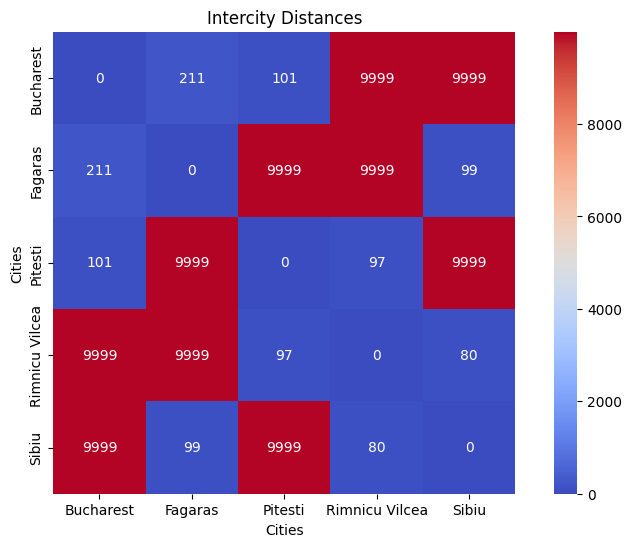

In [7]:
# Visualization of the distance table
plt.figure(figsize=(10, 6))
sns.heatmap(df.astype(float), annot=True, fmt=".0f", cmap='coolwarm', square=True)
plt.title('Intercity Distances')
plt.xlabel('Cities')
plt.ylabel('Cities')
plt.show()

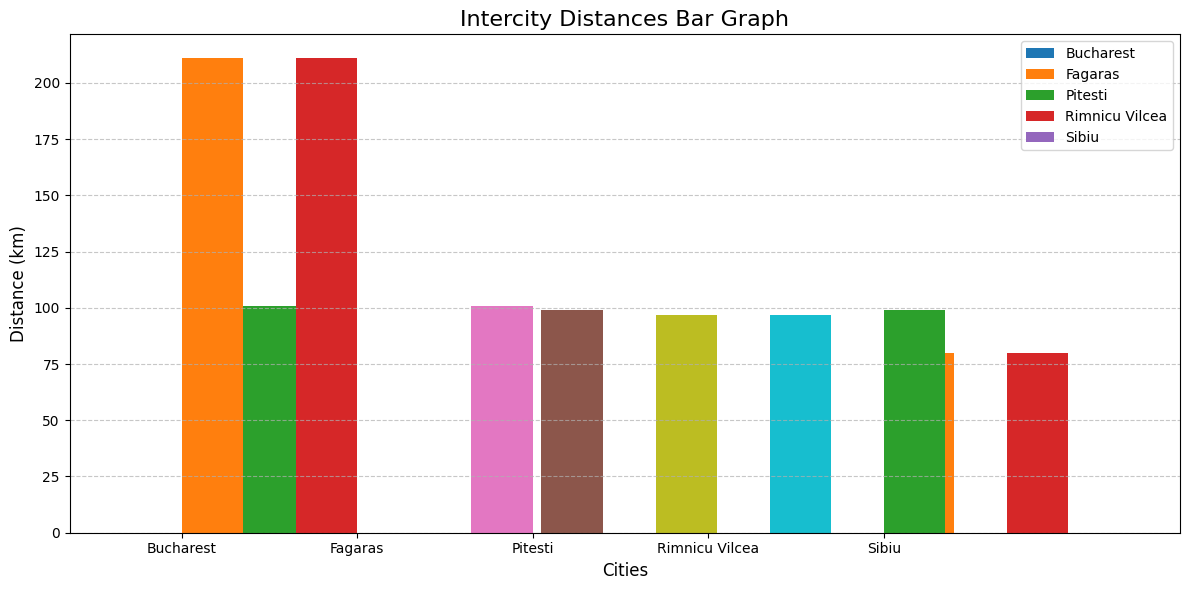

In [10]:
# Visualization of the bar graph for intercity distances
plt.figure(figsize=(12, 6))
bar_width = 0.35  # Width of the bars
index = np.arange(len(cities))  # X locations for the bars

# Prepare data for the bar chart
for i in range(len(cities)):
    for j in range(len(cities)):
        if graph[i][j] != np.inf and graph[i][j] != 9999:
            plt.bar(index[i] + (j * bar_width), graph[i][j], width=bar_width, label=cities[j] if i == 0 else "")

# Customize the plot
plt.title('Intercity Distances Bar Graph', fontsize=16)
plt.xlabel('Cities', fontsize=12)
plt.ylabel('Distance (km)', fontsize=12)
plt.xticks(index + bar_width / 2, cities)
plt.legend(cities)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [14]:
# Function to run and evaluate all search algorithms
def evaluate_search_algorithms(start, goal, iterations=100):
    results = {
        'Algorithm': [],
        'Average Time (s)': [],
        'Average Unique Cities Visited': [],
        'Sample Path': []
    }

    for _ in range(iterations):
        # BFS
        start_time = time.time()
        path = bfs(start, goal)
        end_time = time.time()
        results['Algorithm'].append('BFS')
        results['Average Time (s)'].append(end_time - start_time)
        results['Average Unique Cities Visited'].append(len(set(path)))  # Unique cities visited
        results['Sample Path'].append(path)

        # DFS
        start_time = time.time()
        path = dfs(start, goal)
        end_time = time.time()
        results['Algorithm'].append('DFS')
        results['Average Time (s)'].append(end_time - start_time)
        results['Average Unique Cities Visited'].append(len(set(path)))  # Unique cities visited
        results['Sample Path'].append(path)

        # Best First Search
        start_time = time.time()
        path = best_first_search(start, goal)
        end_time = time.time()
        results['Algorithm'].append('Best First')
        results['Average Time (s)'].append(end_time - start_time)
        results['Average Unique Cities Visited'].append(len(set(path)))  # Unique cities visited
        results['Sample Path'].append(path)

        # A* Search
        start_time = time.time()
        path = a_star(start, goal)
        end_time = time.time()
        results['Algorithm'].append('A*')
        results['Average Time (s)'].append(end_time - start_time)
        results['Average Unique Cities Visited'].append(len(set(path)))  # Unique cities visited
        results['Sample Path'].append(path)

    # Create DataFrame
    results_df = pd.DataFrame(results)

    # Calculate average for each algorithm
    summary = results_df.groupby('Algorithm').agg({
        'Average Time (s)': 'mean',
        'Average Unique Cities Visited': 'mean',
        'Sample Path': 'first'  # Get the first sample path for display
    }).reset_index()

    return summary

# Set start and goal city
start_city = 0  # Bucharest
goal_city = 4   # Sibiu

# Run performance evaluation
performance_results = evaluate_search_algorithms(start_city, goal_city)

# Display results in table format
performance_results.style.set_table_attributes('style="font-size: 14px; text-align: center;"')

,Algorithm,Average Time (s),Average Unique Cities Visited,Sample Path
0,A*,0.000017,3.000000,"[0, 1, 4]"
1,BFS,0.000016,3.000000,"[0, 1, 4]"
2,Best First,0.000013,3.000000,"[0, 1, 4]"
3,DFS,0.000014,4.000000,"[0, 2, 3, 4]"
